# 0. Preparation

In [1]:
# 解压数据集
#! unzip -d ./data ./data/user/肺炎图像/Data.zip

In [2]:
# ! pip install Pillow

In [1]:
# 导入必要的包
import cv2
from PIL import Image
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

import warnings

In [2]:
# 忽略警告
warnings.filterwarnings('ignore')

In [3]:
testPath = './data/Data/test/'
trainPath = './data/Data/train/'
valPath = './data/Data/val/'

# 1. 读取图像

> cv2 返回 height, width, channel
>
> plt 返回 height, width
>
> Iamge 返回 width, height

## 1.1 使用cv2读入

In [6]:
img = cv2.imread('./data/Data/train/NORMAL/IM-0115-0001.jpeg')

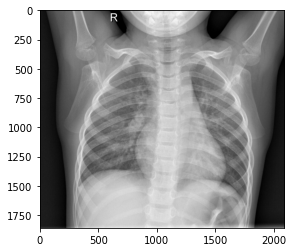

In [7]:
plt.imshow(img)

In [8]:
img.shape

(1858, 2090, 3)

## 1.2 使用plt读入

In [9]:
img_plt = plt.imread('./data/Data/train/NORMAL/IM-0115-0001.jpeg')

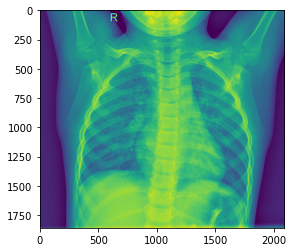

In [10]:
plt.imshow(img_plt)

In [11]:
img_plt.shape

(1858, 2090)

## 1.3. 使用Image读入

In [6]:
img = Image.open('../data/Data/train/NORMAL/IM-0115-0001.jpeg')

In [8]:
img.size

(2090, 1858)

# 2. 转成灰度图

In [12]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [13]:
gray_img.shape

(1858, 2090)

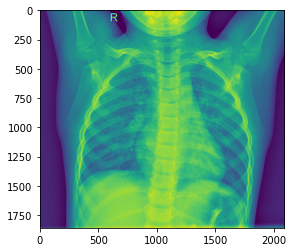

In [14]:
plt.imshow(gray_img)

# 3.图像缩放
1. 最近邻插值法：将每个输出像素的值设为最近的输入像素的值。这种方法简单，但会导致图像模糊且边缘失真。

2. 双线性插值法：将每个输出像素的值设为来自输入图像的 4 个最近的像素的加权平均值。这种方法结果较好，但比较复杂。

3. 双三次插值法：将每个输出像素的值设为来自输入图像的 16 个最近的像素的加权平均值。这种方法的结果比双线性插值法更好，但更复杂。

4. 图像金字塔：通过多次缩小图像并插值，然后再通过多次放大图像并插值来实现图像缩放。这种方法的结果比较好，但比较复杂。

5. 光栅插值法：将输出图像看作由若干个矩形构成，然后根据输入图像中与该矩形对应的像素的值计算输出图像中该矩形内的像素值。这种方法的结果较好，但比较复杂。

## 3.0. 基于Image实现

In [13]:
img = img.resize((224, 224))

## 3.1 最近邻插值法

In [17]:
scaled_img1 = resize(img, (224, 224), mode='reflect', anti_aliasing=False)

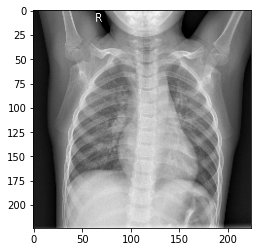

In [18]:
plt.imshow(scaled_img1)

In [15]:
#! pip install scikit-image

In [16]:
from skimage.transform import resize

## 3.2 双线性插值法

In [19]:
scaled_img2 = resize(img, (224, 224), mode='reflect', anti_aliasing=True)

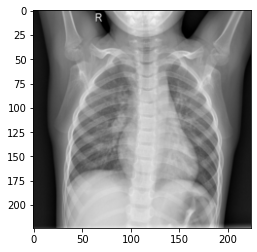

In [20]:
plt.imshow(scaled_img2)

In [21]:
scaled_img2.shape

(224, 224, 3)

## 3.3 双三次插值法

In [22]:
scaled_img3 = resize(img, (224, 224), mode='reflect', anti_aliasing=True, order=3)

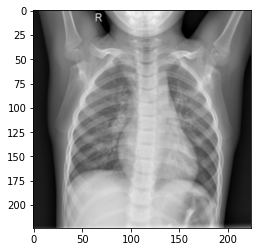

In [23]:
plt.imshow(scaled_img3)

## 3.4 图像金字塔

In [24]:
from skimage.transform import pyramid_reduce, pyramid_expand

In [25]:
# 使用 pyramid_reduce 函数进行缩小
image_reduced = pyramid_reduce(img, downscale=2, sigma=None, order=1, mode='reflect', cval=0, preserve_range=False)

In [26]:
image_reduced.shape

(929, 1045, 2)

In [27]:
# 使用 pyramid_expand 函数进行放大
image_expanded = pyramid_expand(image_reduced, upscale=2, sigma=None, order=1, mode='reflect', cval=0, preserve_range=False)

In [28]:
image_expanded.shape

(1858, 2090, 4)

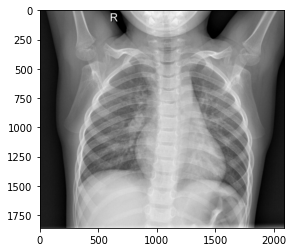

In [29]:
plt.imshow(image_expanded[:,:,:3])

from skimage.transform import AffineTransform, warp### 1.3.5 光栅插值法

In [30]:
from skimage.transform import AffineTransform, warp

In [31]:
# 计算转换矩阵
transMat = AffineTransform(scale=(224 / img.shape[1], 224 / img.shape[0]))

In [32]:
# 调用 skimage 的 warp 函数进行光栅插值法缩放
scaled_img5 = warp(img, transMat, mode='reflect', order=0, preserve_range=True)

> order 指定了使用的插值方法（0 表示最近邻插值法，1 表示双线性插值法，3 表示双三次插值法）

In [33]:
scaled_img5.shape

(1858, 2090, 3)

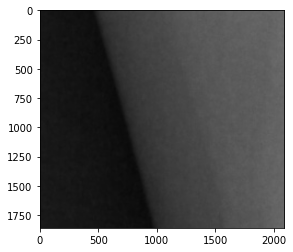

In [34]:
plt.imshow(scaled_img5)

# 4. 图像线性变换

## 4.1. 基于Skimage实现

In [35]:
from skimage.transform import rotate

In [36]:
trans_img1 = rotate(scaled_img1, 45)

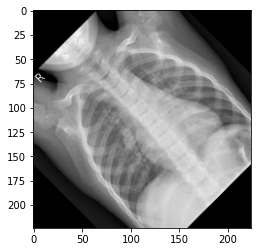

In [37]:
plt.imshow(trans_img1)

In [38]:
trans_img2 = rotate(scaled_img1, 45, resize=True)

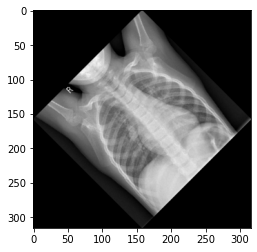

In [39]:
plt.imshow(trans_img2)

In [40]:
trans_img1.shape

(224, 224, 3)

In [41]:
trans_img2.shape

(316, 316, 3)

In [42]:
trans_img3 = rotate(scaled_img1, 10, resize=False, center=[112,112])

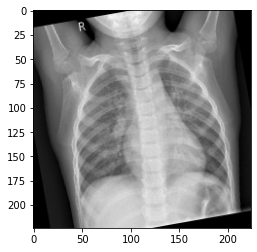

In [43]:
plt.imshow(trans_img3)

In [44]:
trans_img4 = rotate(img, 10)
scaled_img6 = resize(trans_img4, (224, 224), mode='reflect', anti_aliasing=True)

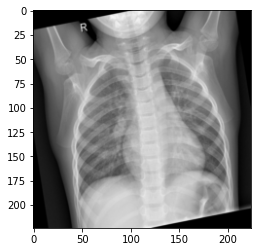

In [45]:
plt.imshow(scaled_img6)

> 看来只能先缩放再线性变化 

**旋转+平移**

In [46]:
from skimage.transform import SimilarityTransform, warp

In [47]:
SimTrans = SimilarityTransform(scale=1,rotation=np.deg2rad(10),translation=(0,-10))

In [48]:
trans_img5 = warp(scaled_img1, SimTrans)

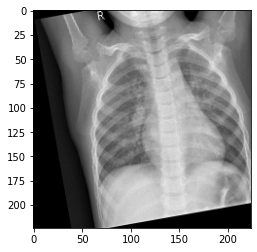

In [49]:
plt.imshow(trans_img5)

## 4.2. 基于Image实现

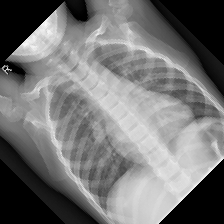

In [14]:
img.rotate(45)

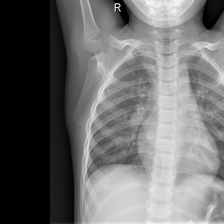

In [21]:
matrix = (1, 0, -50, 0, 1, 0, 0, 0, 1)
# Apply the transformation
im_shifted = img.transform((img.width, img.height), Image.AFFINE, matrix)
im_shifted

# 5. 灰度直方图

In [50]:
from skimage.exposure import histogram, equalize_hist, equalize_adapthist

## 5.1 直方图绘制

In [51]:
hist, bins = histogram(img)

<BarContainer object of 256 artists>

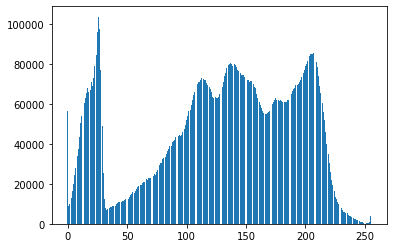

In [64]:
plt.bar(bins, hist)

## 5.2 直方图均衡化

In [53]:
eq_img = equalize_hist(img)

In [54]:
hist2, bins2 = histogram(eq_img)

<BarContainer object of 256 artists>

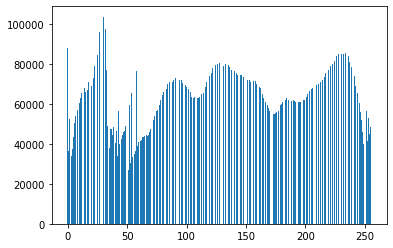

In [55]:
plt.bar(bins, hist2)

## 5.3 自适应直方图均衡化

In [56]:
eqad_img = equalize_adapthist(img)

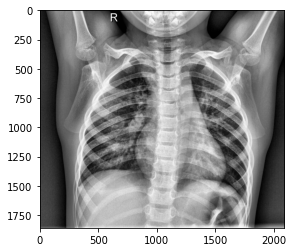

In [57]:
plt.imshow(eqad_img)

In [58]:
hist3, bins3 = histogram(eqad_img)

<BarContainer object of 256 artists>

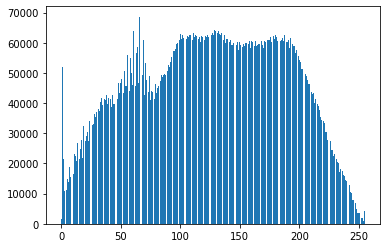

In [59]:
plt.bar(bins, hist3)

(-0.5, 2089.5, 1857.5, -0.5)

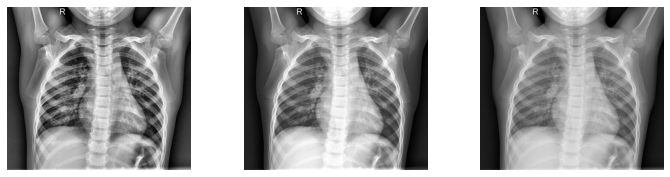

In [60]:
# 绘制原始图像和均衡化后的图像
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(12, 3),
                                sharex=True, sharey=True)
ax0.imshow(eqad_img, cmap=plt.cm.gray)
ax0.axis('off')
ax1.imshow(eq_img, cmap=plt.cm.gray)
ax1.axis('off')
ax2.imshow(img, cmap=plt.cm.gray)
ax2.axis('off')

# 6. 纹理特征

In [71]:
from skimage.feature import graycomatrix, graycoprops
from skimage import data
import numpy as np
from skimage import io, color

In [54]:
def compute_glcm(image, levels=256):
    # convert image to grayscale
    gray_image = image.convert('L')
    # get image as numpy array
    image_array = np.array(gray_image)
    # create a matrix to store GLCM
    glcm_matrix = np.zeros((levels, levels))
    # compute GLCM
    for i in range(image_array.shape[0] - 1):
        for j in range(image_array.shape[1] - 1):
            glcm_matrix[image_array[i, j], image_array[i + 1, j + 1]] += 1
    # normalize GLCM matrix
    glcm_matrix = glcm_matrix / np.sum(glcm_matrix)
    # compute texture features
    contrast = np.sum((np.arange(levels) - np.mean(np.arange(levels))) ** 2 * glcm_matrix)
    return contrast


In [49]:
img = Image.open('../data/Data/train/NORMAL/IM-0115-0001.jpeg')
img = img.resize((224, 224))
img.size

(224, 224)

In [56]:
# compute GLCM
contrast = compute_glcm(img)
print(contrast)

3819.9443031229257


In [62]:
# 读入图像
img = io.imread('../data/Data/train/NORMAL/IM-0115-0001.jpeg')

In [72]:
# 计算GLCM矩阵
glcm_matrix = graycomatrix(img, [1], [0], levels=256, normed=True)

In [66]:
glcm_matrix.shape

(256, 256, 1, 1)

In [73]:
# 计算能量
energy = graycoprops(glcm_matrix, 'energy')[0][0]
# 计算均匀性
homogeneity = graycoprops(glcm_matrix, 'homogeneity')[0][0]
# 计算熵
entropy = graycoprops(glcm_matrix, 'entropy')[0][0]

ValueError: entropy is an invalid property

In [70]:
print("Energy: ", energy)
print("Homogeneity: ", homogeneity)
print("Entropy: ", entropy)

Energy:  0.024941797180902645
Homogeneity:  0.3778497082723664


NameError: name 'entropy' is not defined

In [74]:
print(glcm_matrix)

[[[[4.40360884e-03]]

  [[2.77222274e-04]]

  [[7.93535877e-05]]

  ...

  [[2.57641519e-07]]

  [[1.28820759e-06]]

  [[5.92575493e-06]]]


 [[[2.50685198e-04]]

  [[2.60733217e-04]]

  [[1.54327270e-04]]

  ...

  [[0.00000000e+00]]

  [[5.15283037e-07]]

  [[1.54584911e-06]]]


 [[[8.34758520e-05]]

  [[1.27274910e-04]]

  [[2.65886047e-04]]

  ...

  [[7.72924556e-07]]

  [[5.15283037e-07]]

  [[2.31877367e-06]]]


 ...


 [[[2.57641519e-07]]

  [[2.57641519e-07]]

  [[2.57641519e-07]]

  ...

  [[2.83405670e-06]]

  [[3.09169822e-06]]

  [[1.85501893e-05]]]


 [[[2.83405670e-06]]

  [[7.72924556e-07]]

  [[1.28820759e-06]]

  ...

  [[3.09169822e-06]]

  [[2.08689630e-05]]

  [[5.51352850e-05]]]


 [[[2.06113215e-05]]

  [[3.09169822e-06]]

  [[5.15283037e-07]]

  ...

  [[1.72619817e-05]]

  [[5.41047189e-05]]

  [[2.16418876e-04]]]]
